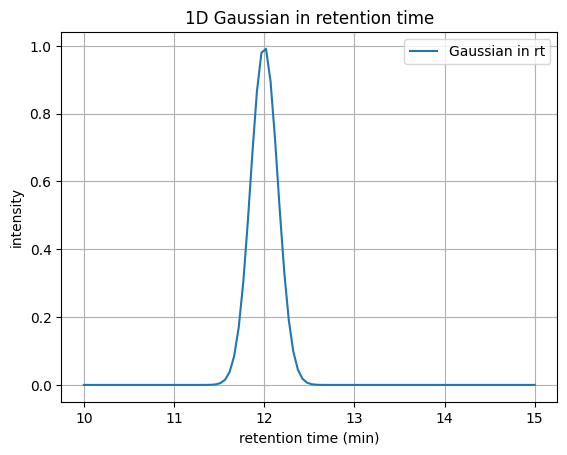

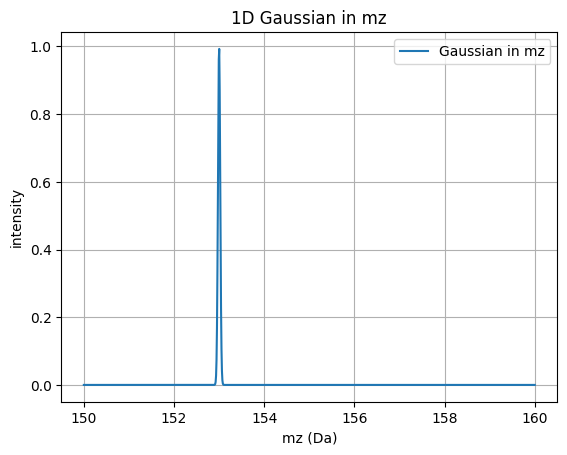

In [91]:
import numpy as np

import matplotlib.pyplot as plt

# Function to generate 1D Gaussian PDF
def gaussian_pdf(x_range, center, sigma, amplitude):
    return amplitude * np.exp(-0.5 * ((x_range - center) / sigma) ** 2)

# Define the range
rt_range = np.linspace(10, 15, 100)
mz_range = np.linspace(150, 160, 1000)
peak_height = 25067

# Generate two Gaussians with different parameters
gaussian_rt = gaussian_pdf(rt_range, center=12, sigma=0.15, amplitude=1)
gaussian_mz = gaussian_pdf(mz_range, center=153, sigma=0.025, amplitude=1)

# Plot the Gaussians
plt.plot(rt_range, gaussian_rt, label='Gaussian in rt')
plt.title('1D Gaussian in retention time')
plt.xlabel('retention time (min)')
plt.ylabel('intensity')
plt.legend(loc='upper right')
plt.grid()
plt.show()

plt.plot(mz_range, gaussian_mz, label='Gaussian in mz')
plt.title('1D Gaussian in mz')
plt.xlabel('mz (Da)')
plt.ylabel('intensity')
plt.legend(loc='upper right')
plt.grid()
plt.show()

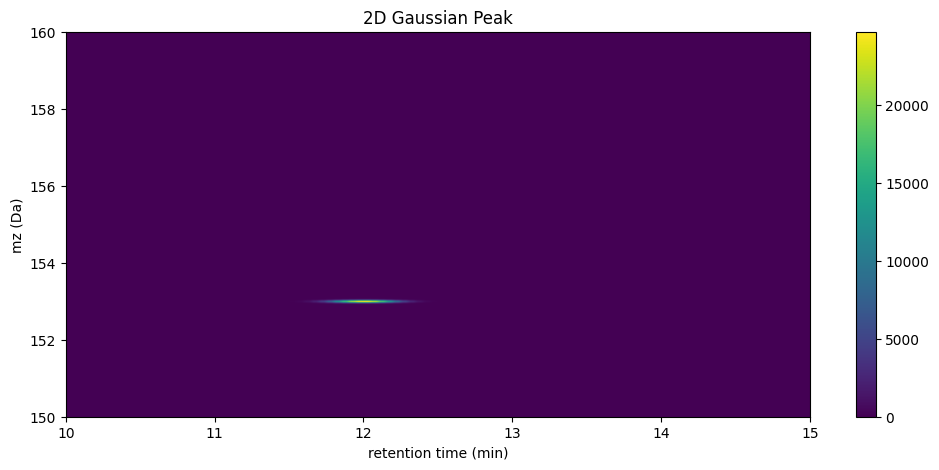

In [92]:
gauss_2d = peak_height * np.outer(gaussian_mz, gaussian_rt)  # y as rows, x as columns

""" # Normalize for visualization
gauss_2d /= gauss_2d.max()
 """
 
# Plot the 2D Gaussian
plt.figure(figsize=(12, 5))
plt.imshow(gauss_2d, extent=[rt_range[0], rt_range[-1], mz_range[-1], mz_range[0]],
           aspect='auto', cmap='viridis')
plt.title("2D Gaussian Peak")
plt.xlabel('retention time (min)')
plt.ylabel('mz (Da)')
plt.ylim(mz_range[0], mz_range[-1])     # Zoom on mass
plt.xlim(rt_range[0], rt_range[-1])
plt.colorbar()
plt.show()

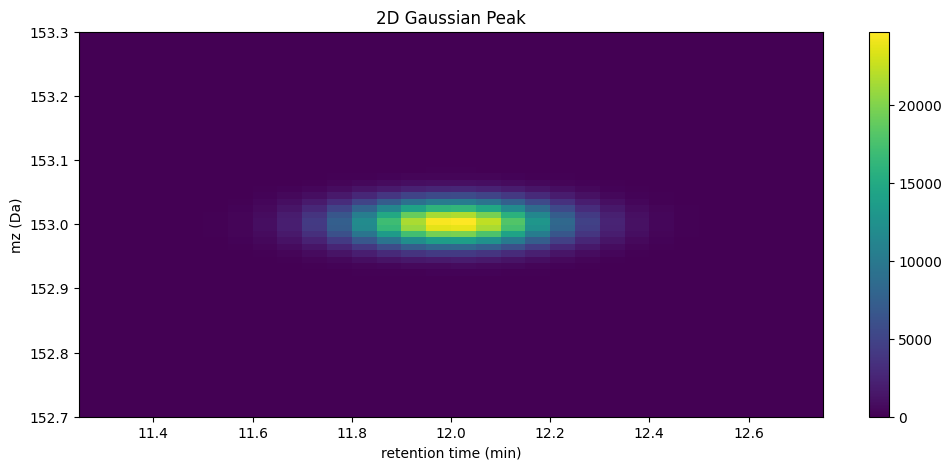

In [93]:
# zoom in on the peak
plt.figure(figsize=(12, 5))
plt.imshow(gauss_2d, extent=[rt_range[0], rt_range[-1], mz_range[-1], mz_range[0]],
           aspect='auto', cmap='viridis')
plt.ylabel('mz (Da)')
plt.xlabel('retention time (min)')
plt.title("2D Gaussian Peak")
plt.ylim(152.70, 153.30)     # Zoom on mass
plt.xlim(11.25, 12.75)
plt.colorbar()
plt.show()

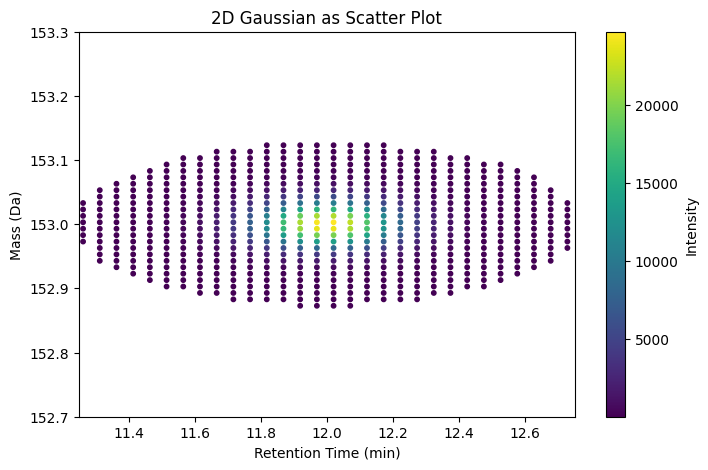

In [94]:
MASS, RT = np.meshgrid(rt_range, mz_range)

# Flatten all arrays for scatter plotting
x = MASS.flatten()
y = RT.flatten()
intensity = gauss_2d.flatten()

# Optional: mask low-intensity points to reduce clutter
mask = intensity > 0.05  # adjust as needed

# Scatter plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x[mask], y[mask], c=intensity[mask], cmap='viridis', s=10)

plt.ylabel("Mass (Da)")
plt.xlabel("Retention Time (min)")
plt.title("2D Gaussian as Scatter Plot")
plt.colorbar(scatter, label="Intensity")
plt.ylim(152.70, 153.30)     # Zoom on mass
plt.xlim(11.25, 12.75)
plt.show()

list of gaussians I want to add with relevant (mew), irregular map (non uniform sampling)

take sampling data points around the mean in mz and retention time

add tails at the end
